# Predicting the Seasonal Vaccine
### Maximizing Vaccine Uptake through Classification
<u>Authors:</u><br>
Paul Justafort<br>
Aung Si<br><br>
August 25<sup>th</sup>, 2023

---

## Contents

- [Introduction](#introduction)
- [The Data](#the-data)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Loading the Data](#loading-the-data)
    - [Choosing Our Target](#choosing-our-target)
    - [Handling Nulls](#handling-nulls)
    - [Reconciling Datatypes](#reconciling-datatypes)
    - [Examining Feature Correlations](#examining-feature-correlations)
- [Preparing for Model Building](#preparing-for-model-building)
- [Building Models](#building-models)
    - [Model 0: Dummy Model](#model-0-dummy-model)
    - [Model 1: Logistic Regression](#model-1-simple-model-logistic-regression)
    - [Model 2: Tuned Logistic Regression](#model-2-tuned-logistic-regression)
    - [Model 3: Decision Tree](#model-3-decision-tree)
    - [Model 4: Tuned Decision Tree](#model-4-tuned-decision-tree)
    - [Model 5: Random Forest](#model-5-random-forest)
    - [Model 6: Tuned Random Forest](#model-6-tuned-random-forest)
    - [Model 7: Random Forest (New Features)](#model-7-random-forest-new-features)
    - [Model 8: Tuned Random Forest (New Features)](#model-8-tuned-random-forest-new-features)
- [Analysis and Recommendations Based on the Best Model](#analysis-and-recommendations-based-on-the-best-model)
    - [Determining the Best Model](#determining-the-best-model)
    - [Feature Importances](#feature-importances)
    - [Addressing Opinions on the Seasonal Flu and the Vaccine](#addressing-opinions-on-the-seasonal-flu-and-the-vaccine)
    - [The Necessity of Doctor Recommendations](#the-necessity-of-doctor-recommendations)
    - [Age Group Delineation](#age-group-delineation)
- [Next Steps](#next-steps)

---

## Introduction 

Vaccines have long been a cornerstone of public health, shielding individuals and entire communities from a wide array of infectious diseases. Among these, the ongoing efforts to immunize against seasonal influenza stand out as a vital and complex undertaking. Unlike specific pandemic strains such as the 2009 H1N1 "swine flu," seasonal flu is a persistent and annually recurring challenge, necessitating vigilance and adaptation by medical professionals every year. Seasonal influenza vaccines are developed and distributed on an annual basis to combat the most common flu strains predicted to circulate during the upcoming flu season. Scientists and researchers analyze global flu trends, collecting samples and data to determine which strains are most likely to pose a threat. The composition of the seasonal flu vaccine is then tailored each year based on these predictions, making it a unique and dynamic tool in the fight against influenza.

In the United States, a coordinated effort involving the government, healthcare providers, public health organizations, and even private companies is launched each year to promote and provide seasonal flu vaccines. This expansive campaign includes public education, accessibility initiatives, and collaboration with healthcare professionals to ensure that vaccines reach as many people as possible. Guiding these efforts are robust data collection and analysis, including surveys and studies that closely monitor vaccination rates. One such resource is the National Seasonal Flu Survey, a comprehensive effort to gather information about individuals' vaccination status, as well as insights into their lives, opinions, and behaviors related to vaccination. In this analysis, we will delve into the data from this survey, applying statistical and analytical techniques to uncover patterns and trends in seasonal flu vaccination. By understanding the factors that influence people's decisions to get vaccinated, such as age, location, education, and beliefs about vaccines, we can craft targeted strategies to increase vaccination rates.

## The Data

The dataset utilized in this project originates from the National 2009 H1N1 Flu Survey (NHFS), conducted during the 2009-10 flu season. This telephone survey was designed to monitor influenza immunization coverage in the United States, specifically targeting individuals aged 6 months or older. A collaboration between the National Center for Immunization and Respiratory Diseases (NCIRD) and the National Center for Health Statistics (NCHS) under the Centers for Disease Control and Prevention (CDC), the NHFS collected information from October 2009 to June 2010. Its primary focus was to produce timely estimates of vaccination coverage rates for both the monovalent pH1N1 and trivalent seasonal influenza vaccines during the 2009-2010 flu season in response to the H1N1 pandemic. The CDC continues to monitor seasonal flu vaccination through other ongoing annual phone surveys, but the NHFS stands as a one-time survey created for this specific purpose.

For our exploration we're given two CSV's:
1. **Training Labels**: This one holds the binary labels we'll be training our model(s) to predict. There are two target labels, `'h1n1_vaccine'` and '`seasonal_vaccine'`— for this analysis we're only concerned with the latter. A $0$ indicates that the given respondent did not receive the respective vaccine while a $1$ indicates that the given respondent received the respective vaccine. This file shares the `'respondent_id'` column with the Training Features CSV.

2. **Training Features**: These are the features we'll be using to predict the probability of a respondent receiving a vaccine. There are 35 features and each is a response to a survey question. Features comprise various topics, such as behavioral (whether a respondent touches their face, washes their hand, etc.), opinion (whether the respondent believed the h1n1 vaccine was effective, etc.), and demographic.

Let's go ahead and import the necessary imports and load in our data so that we can start cleaning it.

## Exploratory Data Analysis

### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.edgecolor'] = 'black'

We are about to load two datasets: the training features and the training labels. The training features include various demographic, behavioral, and medical information about the respondents. The labels contain their vaccination status for H1N1 and seasonal flu.

Next, we'll merge these datasets on the respondent_id to align the features with the corresponding labels, creating a unified DataFrame.

In [2]:
# Load in data
train_features = pd.read_csv('data/training_set_features.csv')
train_labels = pd.read_csv('data/training_set_labels.csv')

train_df = pd.merge(train_labels, train_features, on='respondent_id')
train_df.set_index('respondent_id', inplace=True)

The datasets have been successfully merged on the respondent_id, resulting in a DataFrame with 38 columns. It includes details such as vaccination status, level of concern about H1N1, behavioral tendencies, and demographic information.

With the respondent_id set as the index, we now have a consolidated dataset ready for exploration and preprocessing.

In [3]:
# Examine the dataset's shape
print(f'train_df.shape: {train_df.shape}')

train_df.shape: (26707, 37)


In [4]:
# Examine the dataset's datatypes
train_df.dtypes

h1n1_vaccine                     int64
seasonal_vaccine                 int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                     

### Choosing our target

Next, we'll identify our target variable for modeling. By examining the available options, we'll select the one that best fits our analysis.

In [5]:
# Examine the vaccination value counts
for vaccine in ['seasonal_vaccine', 'h1n1_vaccine']:
    print(train_df[vaccine].value_counts())

# Given that seasonal vaccine has a better class balance, we'll choose that as our target

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64


After examining the vaccination value counts for both H1N1 and seasonal flu, we've chosen the seasonal vaccine as the target variable for our analysis. The reason for this selection is the better class balance in the seasonal vaccine data, which can be more suitable for modeling.

The next steps will involve handling missing values and encoding categorical features to prepare the data for machine learning algorithms

### Handling Nulls

Next, we'll address the missing values in the dataset. By identifying the columns with null values, we'll decide whether to fill or drop them based on the percentage of missing data and the nature of the features.

In [6]:
train_df.isnull().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
i

In [7]:
missing_data = train_df.isnull().sum()
missing_data_pct = missing_data / len(train_df)
missing_data_pct[missing_data_pct > .3]

health_insurance         0.459580
employment_industry      0.499120
employment_occupation    0.504362
dtype: float64

In [8]:
train_df['health_insurance'].fillna(0, inplace=True) # Missing insurance data = lacking insurance data (0)
train_df.drop(columns=['employment_industry', 'employment_occupation'], inplace=True)
train_df.shape

(26707, 35)

Missing values have been handled by filling the 'health_insurance' column with zeros and dropping the 'employment_industry' and 'employment_occupation' columns. The cleaned dataset is now ready for further processing, including encoding categorical variables.

### Reconciling Datatypes

Our next task is to reconcile the datatypes in the dataset. This involves identifying the features with string representations and encoding them into a format suitable for modeling.



In [9]:
string_representations = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']
string_representations

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [10]:
train_df_encoded = pd.get_dummies(train_df, columns=string_representations)
encoded_columns = [col for col in train_df_encoded.columns if any(col.startswith(str_col) for str_col in string_representations)]
train_df_encoded[encoded_columns].dtypes

age_group_18 - 34 Years                     uint8
age_group_35 - 44 Years                     uint8
age_group_45 - 54 Years                     uint8
age_group_55 - 64 Years                     uint8
age_group_65+ Years                         uint8
education_12 Years                          uint8
education_< 12 Years                        uint8
education_College Graduate                  uint8
education_Some College                      uint8
race_Black                                  uint8
race_Hispanic                               uint8
race_Other or Multiple                      uint8
race_White                                  uint8
sex_Female                                  uint8
sex_Male                                    uint8
income_poverty_<= $75,000, Above Poverty    uint8
income_poverty_> $75,000                    uint8
income_poverty_Below Poverty                uint8
marital_status_Married                      uint8
marital_status_Not Married                  uint8


In [11]:
train_df_encoded.shape

(26707, 63)

The string representations in the dataset have been successfully encoded using one-hot encoding. The resulting DataFrame now contains numerical values, making it compatible with various machine learning algorithms. The dataset is ready for further examination and feature selection.

### Examining Feature Correlations

Next, we'll examine the correlations between features in our encoded dataset. This analysis will help us identify any highly correlated features that might require handling with regularization techniques. Addressing high correlation is essential to improve the stability and interpretability of our model, and it's likely to be handled during hyperparameter tuning later on.

In [12]:
corr_mat = train_df_encoded.corr()
corr_mat[corr_mat == 1] = np.nan
five_most_correlated = corr_mat.unstack().sort_values(
    ascending=False
).drop_duplicates()[:5]

print(five_most_correlated)

doctor_recc_seasonal         doctor_recc_h1n1                        0.591868
behavioral_large_gatherings  behavioral_outside_home                 0.584085
opinion_h1n1_risk            opinion_seas_risk                       0.564208
age_group_65+ Years          employment_status_Not in Labor Force    0.498880
opinion_seas_sick_from_vacc  opinion_h1n1_sick_from_vacc             0.491546
dtype: float64


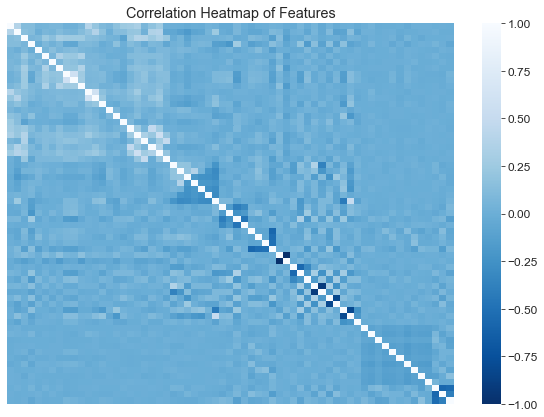

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(train_df_encoded.corr(), cmap='Blues_r')
plt.title('Correlation Heatmap of Features')
plt.xticks([])
plt.yticks([]);

The correlation analysis has revealed moderate positive correlations among various feature pairs in our dataset. While there are no extreme correlations, these moderate relationships still warrant attention.

Regularization techniques will be considered during model training to mitigate the potential impact of these correlations. By doing so, we can improve the generalization and robustness of the final model. Our dataset is now well-prepared for the subsequent stages of analysis and modeling.

## Preparing for Model Building

As we move closer to modeling, our next step is to prepare the dataset for training and testing. This involves selecting our target variable (seasonal_vaccine) and specific features related to behavioral attributes and doctor recommendations. We'll also split the data into training and testing sets, ensuring that 20% of the data is reserved for testing.

In [14]:
from sklearn.model_selection import train_test_split

target = 'seasonal_vaccine' # We want to predict seasonal vaccine

# We choose behavioral features + doctor recommendations for the vaccines as our features.
chosen_features = [column for column in train_df if "behavioral" in column] + \
                  ['doctor_recc_h1n1' ,'doctor_recc_seasonal']

X = train_df_encoded[chosen_features]
y = train_df_encoded[target]

seed = 42 # For reproducability
test_size = .2 # 20% of our data will be in the testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21365, 9), (5342, 9), (21365,), (5342,))

In [15]:
from sklearn.impute import SimpleImputer

# Function to simple impute multiple input datasets
def simple_impute(*Xs):
    results = []
    imputer = SimpleImputer(strategy='most_frequent')
    for X in Xs:
        X_imputed = imputer.fit_transform(X)
        X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
        results.append(X_imputed)
    return tuple(results)

In [16]:
X_train, X_test = simple_impute(X_train, X_test)

print(f'Null values in X_train: {X_train.isnull().sum().sum()}')
print(f'Null values in X_test: {X_test.isnull().sum().sum()}')

Null values in X_train: 0
Null values in X_test: 0


In [17]:
print(f'Null values in y_train: {y_train.isnull().sum().sum()}')
print(f'Null values in y_test: {y_test.isnull().sum().sum()}')

Null values in y_train: 0
Null values in y_test: 0


The dataset has been successfully divided into training and testing sets, with a shape that reflects our selected features. We've also applied a simple imputation strategy to fill any remaining missing values using the 'most frequent' method.

All null values have been addressed, and our dataset is now ready for modeling. In the following steps, we'll build and tune the model, keeping in mind the insights we've gathered during the data exploration and preprocessing phases.

## Building Models

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from model_iteration import ModelIteration

iterations = ModelIteration()

### Model 0: Dummy Model

Before diving into complex models, we'll start with a baseline using a Dummy Classifier. This model will provide a simple prediction based on the most frequent class in the training data. It's essential to establish this baseline to understand how much more complex models are improving performance. We'll use our custom `ModelIteration` class to handle cross-validation and visualize the confusion matrix.

,Test Recall,Train Recall,Test F1,Train F1,Test Roc Auc,Train Roc Auc
Model,,,,,,
Dummy,0.0,0.0,0.0,0.0,0.5,0.5


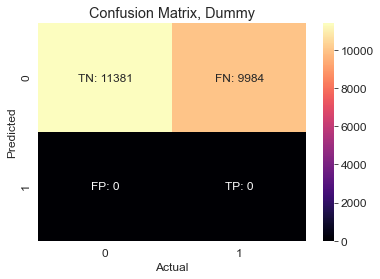

In [19]:
model_0 = 'Dummy'
dummy_model = make_pipeline(StandardScaler(), DummyClassifier(strategy='most_frequent', random_state=seed))
iterations.run_cv(model_0, dummy_model, X_train, y_train)

iterations.get_stats()
iterations.confusion(dummy_model, model_0, X_train, y_train)

The baseline `DummyClassifier` has produced a recall, F1 score, and ROC AUC of 0.0 for both training and testing sets. This outcome is consistent with a model that always predicts the most frequent class, resulting in no true positives. The ROC AUC score of 0.5 further confirms that the model is performing no better than random guessing.

### Model 1: Simple Model (Logistic Regression)

Next, we'll build a Logistic Regression model. By standardizing the features and fitting the model, we aim to improve performance over the baseline Dummy Classifier. Logistic Regression serves as a simple yet powerful algorithm that can capture linear relationships between features and the target variable.

,Test Recall,Train Recall,Test F1,Train F1,Test Roc Auc,Train Roc Auc
Model,,,,,,
Dummy,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.700007,0.700489


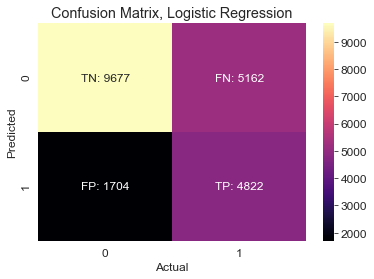

In [20]:
model_1 = 'Logistic Regression'
simple_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=seed))
iterations.run_cv(model_1, simple_model, X_train, y_train)

iterations.get_stats()
iterations.confusion(simple_model, model_1, X_train, y_train)

The Logistic Regression model has shown substantial improvements over the baseline, with a test recall of approximately 0.483, a test F1 score of around 0.584, and a test ROC AUC of roughly 0.700. The confusion matrix further visualizes the model's ability to correctly classify instances.

While these results are promising, further refinement and exploration of different models may lead to even better performance

### Model 2: Tuned Logistic Regression

After running a basic Logistic Regression model, we'll proceed to fine-tune its hyperparameters to see if we can do better. `ModelIteration` helps us do this using `GridSearchCV` or `RandomizedSearchCV` through its `.tune` method.

,Test Recall,Train Recall,Test F1,Train F1,Test Roc Auc,Train Roc Auc
Model,,,,,,
Dummy,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.700007,0.700489
Tuned Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.666625,0.666625


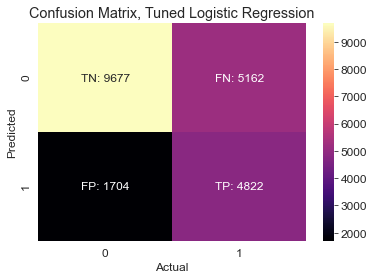

In [21]:
param_grid_1 = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

tuned_simple_model, tuned_simple_model_params = iterations.tune(
    simple_model, param_grid_1, X_train, y_train
)

model_2 = 'Tuned Logistic Regression'
iterations.run_cv(model_2, tuned_simple_model, X_train, y_train)

iterations.get_stats()
iterations.confusion(tuned_simple_model, model_2, X_train, y_train)

The hyperparameter tuning didn't yield any improvement in recall or F1 score compared to the basic Logistic Regression model. Both models have the same scores for these metrics. However, the ROC AUC score has slightly decreased in the tuned model.

This suggests that the initial default hyperparameters were already quite effective for this dataset, or that Logistic Regression may have limitations in capturing the complexity of the data. The results indicate that further model exploration or feature engineering may be needed to achieve higher performance. Next, we'll try a Decision Tree.

In [22]:
print(tuned_simple_model_params)

{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


### Model 3: Decision Tree

,Test Recall,Train Recall,Test F1,Train F1,Test Roc Auc,Train Roc Auc
Model,,,,,,
Dummy,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.700007,0.700489
Tuned Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.666625,0.666625
Decision Tree,0.484776,0.494066,0.581709,0.592603,0.691312,0.714736


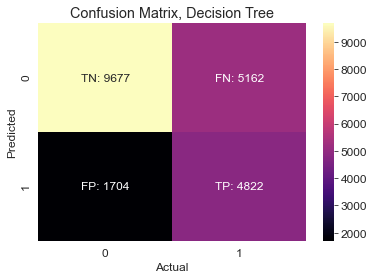

In [23]:
from sklearn.tree import DecisionTreeClassifier

model_3 = 'Decision Tree'
tree_model = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=seed))
iterations.run_cv(model_3, tree_model, X_train, y_train)
iterations.get_stats()
iterations.confusion(simple_model, model_3, X_train, y_train)

The Decision Tree model shows a slight improvement in recall compared to the Logistic Regression models, with a test recall of approximately 0.485. The F1 score is marginally lower, around 0.582, but still competitive. The ROC AUC score is 0.691, which is comparable to the basic Logistic Regression model.

While the Decision Tree model offers some advantages in terms of recall, it doesn't significantly outperform the Logistic Regression models.  We can still do better!

### Model 4: Tuned Decision Tree

,Test Recall,Train Recall,Test F1,Train F1,Test Roc Auc,Train Roc Auc
Model,,,,,,
Dummy,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.700007,0.700489
Tuned Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.666625,0.666625
Decision Tree,0.484776,0.494066,0.581709,0.592603,0.691312,0.714736
Tuned Decision Tree,0.493990,0.495092,0.588975,0.590767,0.695246,0.708621


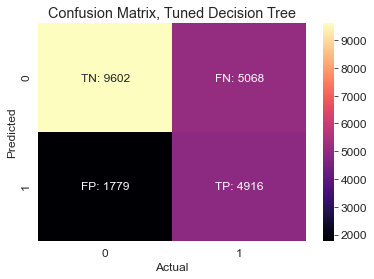

In [24]:
param_grid_2 = {
    'decisiontreeclassifier__max_depth': [None] + list(range(1, 101)),
    'decisiontreeclassifier__min_samples_split': range(2, 101),
    'decisiontreeclassifier__min_samples_leaf': range(1, 101),
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}

tuned_tree_model, tuned_tree_model_params = iterations.tune(
    tree_model, param_grid_2, X_train, y_train, random_state=seed, method='random'
)

model_4 = 'Tuned Decision Tree'
iterations.run_cv(model_4, tuned_tree_model, X_train, y_train)

iterations.get_stats()
iterations.confusion(tuned_tree_model, model_4, X_train, y_train)

The hyperparameter-tuned Decision Tree model shows improvements across the board compared to its untuned counterpart and the Logistic Regression models. The test recall has increased to approximately 0.494, the F1 score has risen to around 0.589, and the ROC AUC score is now 0.695.

This indicates that tuning the Decision Tree model has yielded a more effective model for this dataset. Next we'll try a Random Forest - If the next two models don't improve the scores substantially, we'll introduce new features into the model iteration.

In [25]:
print(tuned_tree_model_params)

{'decisiontreeclassifier__min_samples_split': 83, 'decisiontreeclassifier__min_samples_leaf': 14, 'decisiontreeclassifier__max_depth': 11, 'decisiontreeclassifier__criterion': 'gini'}


### Model 5: Random Forest

,Test Recall,Train Recall,Test F1,Train F1,Test Roc Auc,Train Roc Auc
Model,,,,,,
Dummy,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.700007,0.700489
Tuned Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.666625,0.666625
Decision Tree,0.484776,0.494066,0.581709,0.592603,0.691312,0.714736
Tuned Decision Tree,0.493990,0.495092,0.588975,0.590767,0.695246,0.708621
Random Forest,0.488382,0.496795,0.583760,0.593933,0.691192,0.714471


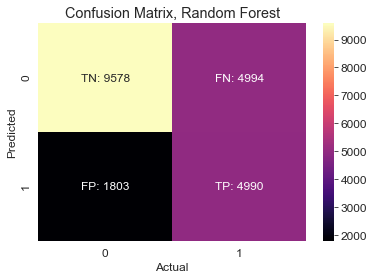

In [26]:
from sklearn.ensemble import RandomForestClassifier

model_5 = 'Random Forest'
forest_model = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=seed))
iterations.run_cv(model_5, forest_model, X_train, y_train)
iterations.get_stats()
iterations.confusion(forest_model, model_5, X_train, y_train)

The Random Forest model yields a test recall of about 0.488, an F1 score of approximately 0.584, and an ROC AUC score of 0.691. These metrics are competitive with the previously tuned models but don't offer a significant boost. Let's tune it further.

### Model 6: Tuned Random Forest

,Test Recall,Train Recall,Test F1,Train F1,Test Roc Auc,Train Roc Auc
Model,,,,,,
Dummy,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.700007,0.700489
Tuned Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.666625,0.666625
Decision Tree,0.484776,0.494066,0.581709,0.592603,0.691312,0.714736
Tuned Decision Tree,0.493990,0.495092,0.588975,0.590767,0.695246,0.708621
Random Forest,0.488382,0.496795,0.583760,0.593933,0.691192,0.714471
Tuned Random Forest,0.493389,0.496494,0.588216,0.592197,0.694274,0.711674


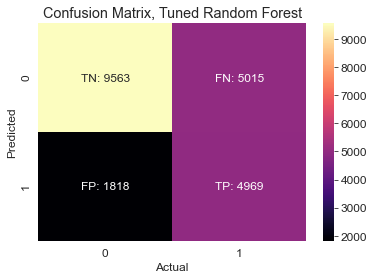

In [27]:
param_grid_3 = {
    'randomforestclassifier__n_estimators': range(50, 200),
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__max_depth': [None] + list(range(5, 50)),
    'randomforestclassifier__min_samples_split': range(2, 20),
    'randomforestclassifier__min_samples_leaf': range(1, 20),
    'randomforestclassifier__bootstrap': [True, False]
}


tuned_forest_model, tuned_forest_model_params = iterations.tune(
    forest_model, param_grid_3, X_train, y_train, random_state=seed, method='random'
)

model_6 = 'Tuned Random Forest'
iterations.run_cv(model_6, tuned_forest_model, X_train, y_train)

iterations.get_stats()
iterations.confusion(tuned_forest_model, model_6, X_train, y_train)

The hyperparameter-tuned Random Forest model shows a test recall of approximately 0.493, an F1 score of around 0.588, and an ROC AUC score of 0.694. These are incremental improvements over the untuned Random Forest and are competitive with the previously tuned models. It seems we aren't able to improve the models we've build thus far beyond its < 0.5 recall score, so we'll try a new approach - we'll add new features to the feature set. 

In [28]:
print(tuned_forest_model_params)

{'randomforestclassifier__n_estimators': 138, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__bootstrap': False}


### Model 7: Random Forest (New Features)

We started with behavioral features and doctor's recommendations (whether a respondent received one or not), but that didn't work too well with respect to recall score, which we want to get as high as possible, so we'll add new features: opinion features, education level, age, and insurance. This will give us 25 features, where at first we only had 9.

In [29]:
new_features = chosen_features.copy()

new_features += [
    col for col in train_df_encoded.columns \
        if 'opinion' in col \
        or 'education' in col \
        or 'age' in col \
        or col == 'health_insurance'
]

len(new_features)

25

,Test Recall,Train Recall,Test F1,Train F1,Test Roc Auc,Train Roc Auc
Model,,,,,,
Dummy,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.700007,0.700489
Tuned Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.666625,0.666625
Decision Tree,0.484776,0.494066,0.581709,0.592603,0.691312,0.714736
Tuned Decision Tree,0.493990,0.495092,0.588975,0.590767,0.695246,0.708621
Random Forest,0.488382,0.496795,0.583760,0.593933,0.691192,0.714471
Tuned Random Forest,0.493389,0.496494,0.588216,0.592197,0.694274,0.711674
Random Forest (New Features),0.738582,0.828450,0.746889,0.837923,0.843657,0.936893


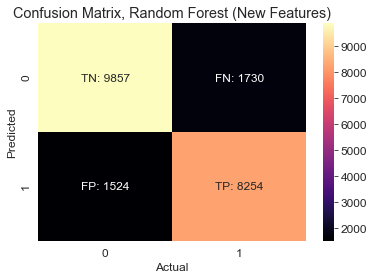

In [30]:
model_7 = 'Random Forest (New Features)'
X_nf = train_df_encoded[new_features].copy()

X_train_nf, X_test_nf, _, _ = train_test_split(X_nf, y, random_state=seed, test_size=test_size)
X_train_nf, X_test_nf = simple_impute(X_train_nf, X_test_nf)

iterations.run_cv(model_7, tuned_forest_model, X_train_nf, y_train)

iterations.get_stats()
iterations.confusion(tuned_forest_model, model_7, X_train_nf, y_train)

By expanding the feature set to include variables related to opinions, education, age, and health insurance, the Random Forest model shows a remarkable improvement. The test recall jumped to approximately 0.739, the F1 score to around 0.747, and the ROC AUC score to 0.844. These metrics are significantly better than any of the previous models, indicating that the additional features contain valuable information for prediction. However, let's tune the model one more time and see how far that gets us.

### Model 8: Tuned Random Forest (New Features)

,Test Recall,Train Recall,Test F1,Train F1,Test Roc Auc,Train Roc Auc
Model,,,,,,
Dummy,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.700007,0.700489
Tuned Logistic Regression,0.482973,0.482973,0.584092,0.584128,0.666625,0.666625
Decision Tree,0.484776,0.494066,0.581709,0.592603,0.691312,0.714736
Tuned Decision Tree,0.493990,0.495092,0.588975,0.590767,0.695246,0.708621
Random Forest,0.488382,0.496795,0.583760,0.593933,0.691192,0.714471
Tuned Random Forest,0.493389,0.496494,0.588216,0.592197,0.694274,0.711674
Random Forest (New Features),0.738582,0.828450,0.746889,0.837923,0.843657,0.936893
Tuned Random Forest (New Features),0.741586,0.778721,0.750863,0.788842,0.847036,0.889214


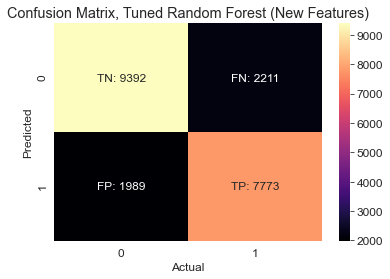

In [31]:
tuned_forest_model_nf, tuned_forest_model_nf_params = iterations.tune(
    tuned_forest_model, param_grid_3, X_train_nf, y_train, random_state=seed, method='random'
)

model_8 = 'Tuned Random Forest (New Features)'
iterations.run_cv(model_8, tuned_forest_model_nf, X_train_nf, y_train)

iterations.get_stats()
iterations.confusion(tuned_forest_model_nf, model_8, X_train_nf, y_train)

The hyperparameter-tuned Random Forest model with the new features exhibits even better performance. The test recall is approximately 0.742, the F1 score is around 0.751, and the ROC AUC score stands at 0.847. These are all improvements over the already impressive untuned model with the new features.

Given these results, this tuned Random Forest model is our final and best-performing model, and we'll use this it as the center of our analysis.

## Analysis and Recommendations Based on the Best Model

### Determining the Best Model

In [32]:
best_model = tuned_forest_model_nf
print(best_model[1])

RandomForestClassifier(max_depth=21, min_samples_leaf=9, min_samples_split=9,
                       n_estimators=91, random_state=42)


Up to this point, we've been evaluating our models using cross-validation on the training data. To fully assess the effectiveness of our final model, it's crucial to test it on unseen data. We'll run it on our test set to obtain the accuracy and recall scores.

In [33]:
from sklearn.metrics import recall_score, accuracy_score

y_pred = best_model.predict(X_test_nf)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy Score on Test Data: {accuracy:,.4f}')
print(f'Recall Score on Test Data: {recall:,.4f}')

Accuracy Score on Test Data: 0.7784
Recall Score on Test Data: 0.7552


The final model yields an accuracy score of approximately 0.7784 and a recall score of about 0.7552 on the test data. These results affirm the robustness of the model, substantiating its strong performance in cross-validation. Let's move onto some further anlaysis with this model!

### Feature Importances

To understand the influence of individual features on the final model, we'll examine the top 10 features based on their importances. This will give us insights into which variables are most predictive for the seasonal vaccine uptake.

In [34]:
feature_importances = tuned_forest_model_nf.steps[1][1].feature_importances_
feature_importances_df = pd.DataFrame(feature_importances, index=X_train_nf.columns)
feature_importances_df = feature_importances_df.rename(
    columns={0: 'Feature Importance'}
).sort_values(by='Feature Importance', ascending=False
)

top_10 = feature_importances_df[:10]
top_5 = feature_importances_df[:5]

In [89]:
top_10.index = [
    'Believes Seasonal Vaccine is Effective',
    'Believes Seasonal Flu is Risky',
    'Received Doctor\'s Recommendation for Seasonal Vaccine',
    '65+ Years Old',
    'Believes H1N1 is Risky',
    'Believes H1N1 Vaccine is Effective',
    'Believes They Get Sick from Seasonal Vaccine',
    '18-34 Years Old',
    'Received Doctor\'s Recommendation for H1N1 Vaccine',
    'Has Health Insurance'
]

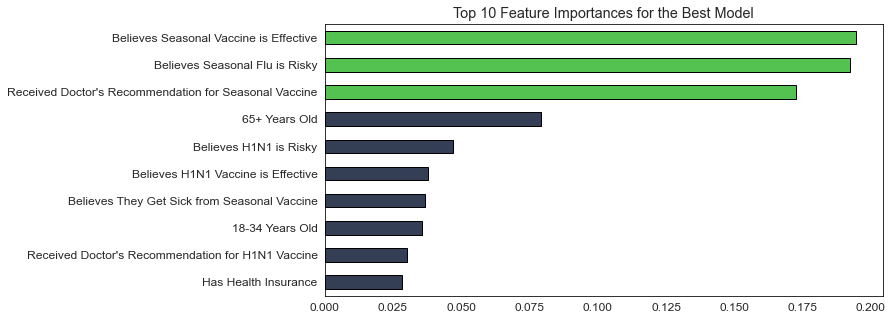

In [177]:
ax = top_10.iloc[::-1].plot.barh(figsize=(10,5), color='#54C251', legend=False, edgecolor='k')

for i in range(7):
    ax.get_children()[i].set_color('#343f56')
    ax.get_children()[i].set_edgecolor('k')

plt.grid(False)
plt.title('Top 10 Feature Importances for the Best Model');

1. **Opinion on Seasonal Vaccine Effectiveness**: This is the most important feature, with an importance score of approximately 0.195. This suggests people's opinions on the vaccine's effectiveness are highly predictive.
2. **Opinion on Seasonal Vaccine Risk**: Closely following the first, with a score of around 0.192. Perceptions of risk clearly affect the decision to vaccinate.
3. **Doctor's Recommendation for Seasonal Vaccine**: Holds significant weight with a score of 0.173, indicating the influence of medical advice on vaccination.
4. **Age Group 65+ Years**: With a score of 0.079, this shows that age, particularly being older, is a strong predictor.
5. **Opinion on H1N1 Risk**: Score of 0.047. Although this is for a different vaccine, perceptions of risk in one context appear to influence the other.
6. **Opinion on H1N1 Vaccine Effectiveness**: Score of 0.038. Similar to the above point, opinions about H1N1 also matter for the seasonal vaccine.
7. **Opinion on Getting Sick from Seasonal Vaccine**: Score of 0.037. Concerns about side effects are also a factor.
8. **Age Group 18-34 Years**: Score of 0.036, suggesting younger age groups are less likely to get vaccinated.
9. **Doctor's Recommendation for H1N1**: Score of 0.030. Again, medical advice plays a role, even if it's for a different vaccine.
10. **Health Insurance**: Score of 0.028, indicating that having insurance might facilitate the decision to get vaccinated.

### Addressing Opinions on the Seasonal Flu and the Vaccine

Given the above feature importances, we'll examine the rate of vaccination across three features: opinion on the vaccine's effectiveness, whether a respondent received a doctor's recommendation for the seasonal vaccine, and how two distinct age groups differ int heir rate of vaccination. Let's first see how much more likely those with a high opinion of the vaccine are to get the seasonal vaccine compared to those who do not.

In [178]:
# Likelihood of getting the vaccine based on belief

# Define believers and non-believers based on opinion_seas_vacc_effective values
believers = [3, 4, 5]
non_believers = [1, 2]

# Define vaccinated individuals
vacc = train_df_encoded.seasonal_vaccine == 1
# Define believers and non-believers
believe = train_df_encoded.opinion_seas_vacc_effective.isin(believers)
does_not_believe = train_df_encoded.opinion_seas_vacc_effective.isin(non_believers)

# Number of vaccinated individuals who believe in vaccine effectiveness
num_vacc_and_believe = len(train_df_encoded[vacc & believe])
# Total number of individuals who believe in vaccine effectiveness
num_believe = len(train_df_encoded[believe])
# Percentage of believers who got vaccinated
pct_vacc_and_believe = num_vacc_and_believe / num_believe

# Number of vaccinated individuals who do not believe in vaccine effectiveness
num_vacc_and_not_believe = len(train_df_encoded[vacc & does_not_believe])
# Total number of individuals who do not believe in vaccine effectiveness
num_not_believe = len(train_df_encoded[does_not_believe])
# Percentage of non-believers who got vaccinated
pct_vacc_and_not_believe = num_vacc_and_not_believe / num_not_believe

opinion = {
    'Category': ['Believers', 'Non-Believers'],
    'Percentage Vaccinated': [pct_vacc_and_believe * 100, pct_vacc_and_not_believe * 100]
}

opinion = pd.DataFrame(opinion).set_index('Category')

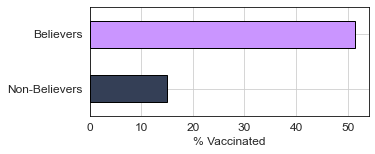

In [195]:
ax2 = opinion.iloc[::-1].plot.barh(color='#CA95FF', edgecolor='k', legend=False, figsize=(5, 2))

for i in range(1):
    ax2.get_children()[i].set_color('#343f56')
    ax2.get_children()[i].set_edgecolor('k')

plt.xlabel('% Vaccinated')
plt.ylabel('');

Here, we see that those who believe in the efficacy of the seasonal vaccine are **more than twice**—**about 3 times** more likley to get the vaccine as those who do not; this informs us that measures must be taken so as to ensure adequate education upon the subject matter of the seasonal flu and the corresponding vaccine.

### The Necessity of Doctor Recommendations

Let's now see how much more likely those who got a doctor's recommendation for the seasonal vaccine are to get the vaccine than those who did not.

In [186]:
# Likelihood of getting the vaccine given a recommendation from the doctor

# Define doctor's recommendation for seasonal vaccine and vaccination
has_doctors_rec = train_df_encoded.doctor_recc_seasonal == 1

# Number and percentage of vaccinated individuals with doctor's recommendation
num_vacc_and_has_rec = len(train_df_encoded[vacc & has_doctors_rec])
num_has_rec = len(train_df_encoded[has_doctors_rec])
pct_vacc_and_has_rec = num_vacc_and_has_rec / num_has_rec

# Number and percentage of vaccinated individuals without doctor's recommendation
num_vacc_and_no_rec = len(train_df_encoded[vacc & ~has_doctors_rec])
num_no_rec = len(train_df_encoded[~has_doctors_rec])
pct_vacc_and_no_rec = num_vacc_and_no_rec / num_no_rec

# Create a DataFrame with the data
rec = {
    'Category': ['Has Doctor\'s Recommendation', 'No Doctor\'s Recommendation'],
    'Percentage Vaccinated': [pct_vacc_and_has_rec * 100, pct_vacc_and_no_rec * 100]
}

rec = pd.DataFrame(rec).set_index('Category')

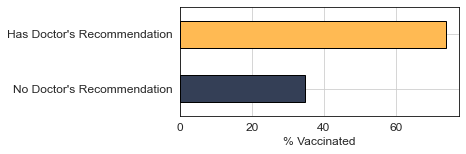

In [194]:
ax3 = rec.iloc[::-1].plot.barh(color='#FFBA53', edgecolor='k', legend=False, figsize=(5, 2))

for i in range(1):
    ax3.get_children()[i].set_color('#343f56')
    ax3.get_children()[i].set_edgecolor('k')

plt.xlabel('% Vaccinated')
plt.ylabel('');

We see that those who received a doctor's recommendation for the seasonal vaccine are about **twice as likely** to get the vaccine as those who did not. This tells us that efforts must be made on the front of providing doctors with the resources, incentives, and the means to recommend patients to get the seasonal vaccine during doctor-patient consultations.

### Age Group Delineation

Finally, let's examine how two distinct age groups, those between 18 - 34 years old and those beyond 65 years old, differ in their vaccination rates.

In [196]:
# Likelihood of getting vaccinated if old vs. if young

old = train_df_encoded['age_group_65+ Years'] == 1
young = train_df_encoded['age_group_18 - 34 Years'] == 1

num_vacc_and_old = len(train_df_encoded[vacc & old])
num_old = len(train_df_encoded[old])
pct_vacc_and_old = num_vacc_and_old / num_old

num_vacc_and_young = len(train_df_encoded[vacc & young])
num_young = len(train_df_encoded[young])
pct_vacc_and_young = num_vacc_and_young / num_young

age = {
    'Category': ['Young (18-34 Y.O.)', 'Old (65+ Y.O.)'],
    'Percentage Vaccinated': [pct_vacc_and_young * 100, pct_vacc_and_old * 100]
}

age = pd.DataFrame(age).set_index('Category')

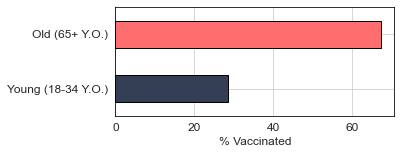

In [198]:
ax4 = age.plot.barh(color='#FF6E6E', edgecolor='k', legend=False, figsize=(5, 2))

for i in range(1):
    ax4.get_children()[i].set_color('#343f56')
    ax4.get_children()[i].set_edgecolor('k')

plt.xlabel('% Vaccinated')
plt.ylabel('');

We see that older individuals (65+ years old), are **more than twice as likely** to get the vaccine than younger individuals (18 - 34 years old). This informs us that measures like the creation of targeted marketing campaigns—specifically catered to appeal to different age groups—are necessary so as to increase vaccine uptake in a broad and holistic manner that accounts for their behavioral differences.

## Next Steps
For next steps, we'll need to analyze additional demographic and behavioral features to better refine our targeting strategies for vaccination campaigns. A real-time monitoring system should be developed to track vaccination rates, enabling timely adjustments to our outreach efforts. Collaborating with healthcare and community organizations will be essential for implementing our data-driven recommendations. To gauge the effectiveness of these efforts, follow-up surveys will need to be conducted. Based on these results, further adjustments can be made to our strategies. Additionally, exploring machine learning model optimization techniques will be necessary to improve the prediction accuracy of our models, thereby enhancing the overall efficacy of our vaccination initiatives.